Příprava dat

In [111]:

import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence


data = pd.read_csv("adm_data.csv")
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [112]:
data.columns = data.columns.str.strip()
data=data.rename(columns={
    "GRE Score": "GRE_Score",
    "TOEFL Score": "TOEFL_Score",
    "University Rating": "University_Rating",
    "Chance of Admit": "Chance",
    })

data

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Nejprve jsem si načetla knihovny, které by se mi mohly hodit. Dále jsem si načetla dataset a koukla se na prvních 5 řádkůů, abych měla představu, jak data vypadají.

Podle zadání jsem přejmenovala sloupce tak, abych z nich odstranila mezery.

Normálnost dat pro TOEFL skóre

In [113]:
data["TOEFL_Score"].mean()


107.41

In [114]:
data["TOEFL_Score"].median()

107.0

In [115]:

data["TOEFL_Score"].std()

6.069513777374126

<Axes: xlabel='TOEFL_Score', ylabel='Count'>

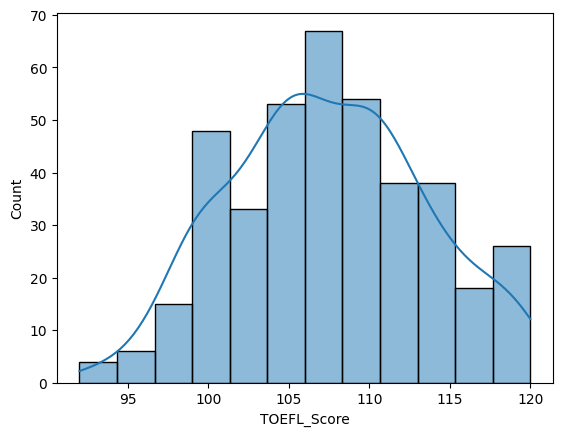

In [116]:
sns.histplot(data["TOEFL_Score"], kde=True)

In [117]:
stats.normaltest(data["TOEFL_Score"])

NormaltestResult(statistic=11.070212103496331, pvalue=0.003945790155853822)

Pro TOEFL skóre jsem vypočítala:
průměr:107.4
medián:107.0
směrodatnou odchylku:6.1

Dále jsem vytvořila histogram s odhadovanou křivkou

Nakonec jsem použila test pro normální rozdělení.
H0: Data mají normální rozdělení.
H1: Data nemají normální rozdělení.
Hladina významnosti 5 %

p-hodnota (0.004) je menší než 0.05, zamítáme nulovou hypotézu. Data tedy nemají normální rozdělení na hladině významnosti 5%.

Testování hypotéz

In [118]:
data_ano = data[data["Research"] == 1]
data_ne = data[data["Research"] == 0]

In [119]:
data_ano["GRE_Score"].mean()

322.85388127853884

In [120]:
data_ne["GRE_Score"].mean()

309.49171270718233

In [121]:
stats.ttest_ind(data_ano["GRE_Score"], data_ne["GRE_Score"])

TtestResult(statistic=14.218609390981028, pvalue=2.168740602699294e-37, df=398.0)

Data jsem rozdělila na studenty, kteří mají a nemají zkušenost s výzkumem.
Pro obě jsem spočítala průměrné GRE skóre.
Pak jsem si stanovila 
H0: Studenti, kteří mají zkušenost s výzkumem mají stejné GRE skóre jako studenti, kteří s výzkumem zkušenost nemají
H1: Studenti, kteří mají zkušenost s výzkumem mají jiné GRE skóre než studenti, kteří s výzkumem zkušenost nemají

Hladinu významnosti jsem si zvolila 5 %
p-hodnota je menší než 0.05, proto zamítáme nulovou hypotézu na hladině významnosti 5%


In [122]:
data.corr()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE_Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


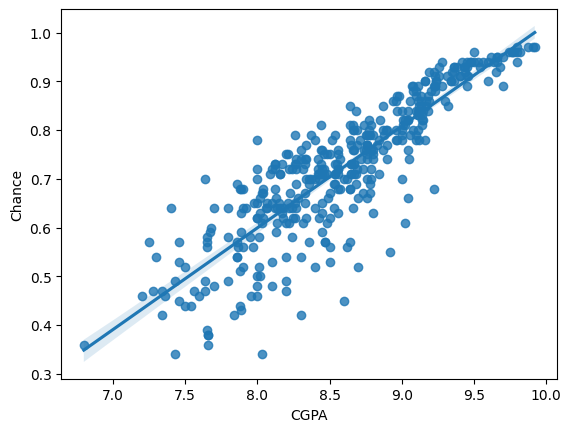

In [123]:
g = sns.regplot(data, x="CGPA", y="Chance")


Korelace mezi TOEFL a GRE skóre popisuje korelační koeficient = 0.84
Protože je to hodnota blízká +1 - znamená to přímou lineární závislost, tj. hodnoty v obou sloupcích rostou současně.


Proměnná šance na přijetí má největší korelaci s proměnnou průměrná známka z bakalářského studia. Korelační koeficient je 0.87 - ukazuje to na silnou přímou lineární závislost, což je patrné i z grafu.
Šance na přijetí je vyšší, čím vyšší je průměrná známka z bakalářského studia.

Vysvětlovaná proměnná

<Axes: xlabel='Chance'>

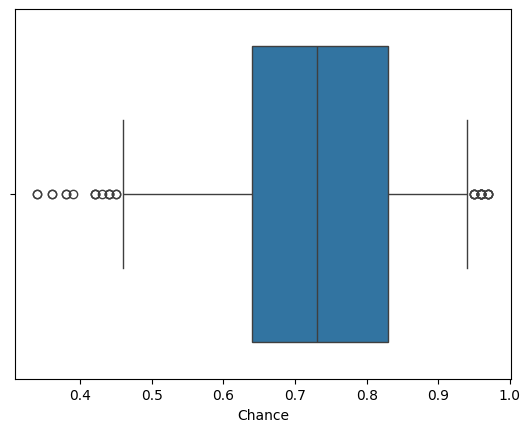

In [124]:
sns.boxplot(data, x="Chance", whis=[5, 95])

In [125]:
np.quantile(data["Chance"], 0.05)

0.46

In [126]:
np.quantile(data["Chance"], 0.95)

0.94

In [127]:
data1=data[(data["Chance"] > 0.46) & (data["Chance"] < 0.94)]
data1


,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
394,395,329,111,4,4.5,4.0,9.23,1,0.89
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91


Vytvořia jsem boxplot pro proměnnou šance na přijetí, čáry označené jako whis jsem nastavila tak, aby graf označoval 90 % všech hodnot, tj. hodnoty mezi 5%ním a 95%ním kvantilem.
Na boxplotu jsou vydět odlehlá pozorování v podobě kroužků. Dále jsem si zjistila hodnotu kvantilů:
5%:0,46
95%:0,94
A na základě těchto hodnot jsem vytvořila nový dataset bez odlehlých hodnot.

Lineární regrese

In [128]:
formula = "Chance ~ GRE_Score + TOEFL_Score + University_Rating + SOP + LOR + CGPA + Research"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Chance   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 06 May 2024   Prob (F-statistic):          3.12e-134
Time:                        13:37:14   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2594      0.125    -10.097      0.000      -1.505      -1.014
GRE_Score             0.0017      0.001      2.906      0.004       0.001       0.003
TOEFL_Score           0.0029      0.001      2.680      0.008       0.001       0.005
University_Rating     0.0057      0.005      1.198      0.232      -0.004       0.015
SOP                  -0.0033      0.006     -0.594      0.553      -0.014       0.008
LOR                   0.0224      0.006      4.034      0.000       0.011       0.033
CGPA                  0.1189      0.012      9.734      0.000       0.095       0.143
Research              0.0245      0.008      3.081      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Do lineární regrese jsem zahrnula všechny proměnné kromě Serial No.. Rozhodovala jsem se podle korelační matice, kde se všechny koeficienty, blížíli spíše 1 než 0.

Koeficienty:
Pokud je p-hodnota testu méně než 0.05, můžeme tedy koeficient označit jako statisticky významný. p-hodnotu testu najdeme ve sloupci P>|t|.
V našem případě platí, že 
Intercept (protíná osu y v bodě 0) je statisticky významný
GRE_Score je statisticky významný, stoupne-li GRE skóre o jeden bod, šancee na přiejetí se zvýší o hodnotu 0.0017.
TOEFL_Score	je statisticky významný, stoupne-li TOEFL skóre o jeden bod, šance na přiejetí se zvýší o hodnotu 0.0029.
University_Rating je statisticky nevýznamný	
SOP	je statisticky nevýznamný
LOR	je statisticky významný, stoupne-li LOR o jeden bod, šance na přiejetí se zvýší o hodnotu 0.0224.
CGPA je statisticky významný, stoupne-li průměrná známka z bakalářského studia o jeden bod, šance na přiejetí se zvýší o hodnotu 0.1189.
Research je statisticky významný, zúčastní-li se student výzkumu, šance na přiejetí se zvýší o hodnotu 0.0245.

Šance na přijetí stoupá nejvíce s průměrnou známkou z bakalářského studia (nejvyšší hodnota koeficientu)

Koeficient determinace je 0.803, dokáže tedy vysvětlit přibližně 80 % variability proměnné šance na přijetí.


Bonus

In [129]:
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance,Cook Distance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000423
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000771
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002327
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.001616
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000090


<Axes: xlabel='Cook Distance', ylabel='Count'>

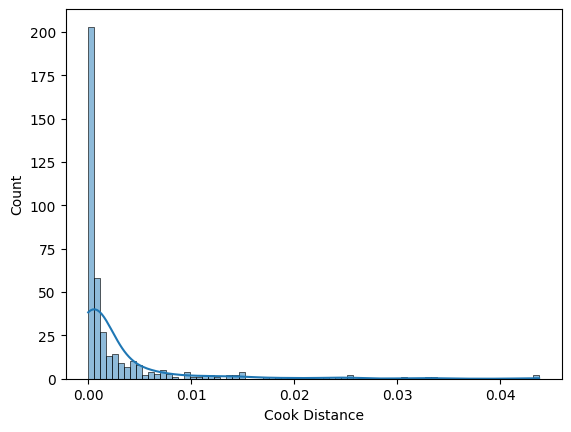

In [130]:
sns.histplot(data["Cook Distance"], kde=True)

Spočítala jsem Cookovu vzdálenost a vytvořila histogram. Jednoduché pravidlo (rule of the thumb) doporučuje odstranit hodnoty s Cookovou vzdáleností vyšší než 1. Proto žádné hodnoty neodstraňuji.